# Project: The Movie Database(TDMS)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The movie database(TMDB) is community that contains informations about movies and TVs which is stored in databases and it is sourced from the provided datasets by udacity.  The dataset is about movie from the year 1966 to 2015 and contains columns like cast, budget. 

The questions i planned to answer with this dataset are:
- What year generated the highest revenue?
- How many movies was released each year?
- What is the budget to revnue in each year?
- What year was the movie industry unprofitable?
- What are the top 10 movies in terms of average counts?
- What are the top 10 lowest movies in terms of average counts?

Imported NumPy, Pandas, Matplotlib and Seaborn which are libraries in Python that are going to be used in this analysis. Added some styling to the Matplotlib. Imported warnings to ignore the error messages since the work fine.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
color_palette = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.style.use('ggplot')

<a id='wrangling'></a>
## Data Wrangling



### General Properties

Imported the tmdb movies csv file from the directories on local machine.

In [2]:
tmdb_df = pd.read_csv('Downloads/tmdb-movies.csv')

Checking the head of the dataset

In [3]:
tmdb_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Checking the shape of the dataset

In [4]:
tmdb_df.shape

(10866, 21)

Checking the information of the dataset to have a look at the data types and also if there is null or missing values.

In [5]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Check the summary statistics of the datasets and also add lambda to format the percentages which are in exponential to decimals.

In [6]:
tmdb_df.describe().T.apply(lambda s: s.apply(lambda x: format(x, 'f')))

,count,mean,std,min,25%,50%,75%,max
id,10866.000000,66064.177434,92130.136561,5.000000,10596.250000,20669.000000,75610.000000,417859.000000
popularity,10866.000000,0.646441,1.000185,0.000065,0.207583,0.383856,0.713817,32.985763
budget,10866.000000,14625701.094147,30913213.831437,0.000000,0.000000,0.000000,15000000.000000,425000000.000000
revenue,10866.000000,39823319.793392,117003486.582085,0.000000,0.000000,0.000000,24000000.000000,2781505847.000000
runtime,10866.000000,102.070863,31.381405,0.000000,90.000000,99.000000,111.000000,900.000000
vote_count,10866.000000,217.389748,575.619058,10.000000,17.000000,38.000000,145.750000,9767.000000
vote_average,10866.000000,5.974922,0.935142,1.500000,5.400000,6.000000,6.600000,9.200000
release_year,10866.000000,2001.322658,12.812941,1960.000000,1995.000000,2006.000000,2011.000000,2015.000000
budget_adj,10866.000000,17551039.822887,34306155.722844,0.000000,0.000000,0.000000,20853251.084404,425000000.000000
revenue_adj,10866.000000,51364363.253251,144632485.039975,0.000000,0.000000,0.000000,33697095.717312,2827123750.411890


Checking the sum of null or missing values in each columns

In [7]:
tmdb_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Data Cleaning of the dataset

Checking the columns with the amounts of null or missing values in each rows.

In [8]:
tmdb_df.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
10861    2
10862    1
10863    2
10864    1
10865    1
Length: 10866, dtype: int64

Creating a new columns to show the amount of null or missing values in each rows.

In [9]:
tmdb_df['missing_vals'] = tmdb_df.isnull().sum(axis=1)

Check the sample of the dataset to view the new column and also check the amounts of null values in each rows

In [10]:
tmdb_df.sample(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,missing_vals
10309,8494,tt0108539,0.448437,0,0,Weekend at Bernie's II,Andrew McCarthy|Jonathan Silverman|Terry Kiser...,NaN,Robert Klane,You don't have to stop partying just because y...,...,97,Comedy,TriStar Pictures|Artimm,7/9/93,37,5.2,1993,0.000000e+00,0.000000e+00,1
7401,1271,tt0416449,2.191408,65000000,422610419,300,Gerard Butler|Lena Headey|Dominic West|David W...,http://300themovie.warnerbros.com,Zack Snyder,"Spartans, prepare for glory!",...,117,Action|Adventure|War,Virtual Studios|Legendary Pictures|Hollywood G...,3/7/07,3428,7.0,2007,6.835846e+07,4.444461e+08,0
5907,245169,tt2597718,0.131381,0,0,Three Night Stand,Sam Huntington|Meaghan Rath|Emmanuelle Chriqui...,NaN,Pat Kiely,Meet Carl. His wife. & the Love of his Life.,...,86,Comedy|Drama,Vroom Productions|Banner House Productions,12/6/13,13,4.8,2013,0.000000e+00,0.000000e+00,1


Checking the counts of the null values that appear in each rows. 

In [11]:
tmdb_df['missing_vals'].value_counts()

1    5693
2    2098
0    1992
3     833
4     212
5      30
6       8
Name: missing_vals, dtype: int64

Plotting the counts of the null values that appear in each rows. The rows with the least null value contain one while the highest contain six.

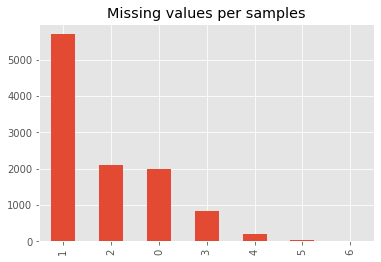

In [12]:
tmdb_df['missing_vals'].value_counts().plot(kind='bar', title='Missing values per samples');

Checking the columns that contain six null values in each rows. Also spotted something unusual appear in the dataset which is that there are movies with missing budget and revenue.

In [13]:
tmdb_df[(tmdb_df['missing_vals'] == 6)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,missing_vals
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,...,44,NaN,NaN,10/3/14,13,6.8,2014,0.0,0.0,6
2370,127717,tt1525359,0.081892,0,0,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,NaN,Michael Scott,NaN,...,0,NaN,NaN,6/5/10,12,5.8,2010,0.0,0.0,6
2376,315620,tt1672218,0.068411,0,0,Doctor Who: A Christmas Carol,Matt Smith|Karen Gillan|Arthur Darvill|Michael...,NaN,NaN,NaN,...,62,NaN,NaN,12/25/10,11,7.7,2010,0.0,0.0,6
2397,241829,tt1805454,0.033048,0,0,The Making of The Walking Dead,NaN,NaN,NaN,NaN,...,30,Documentary,NaN,7/31/10,42,8.4,2010,0.0,0.0,6
3369,77974,tt2014400,0.001682,0,0,Wizards On Deck With Hannah Montana,NaN,NaN,NaN,NaN,...,68,Family,NaN,2/11/08,14,6.1,2008,0.0,0.0,6
3910,79976,tt2096615,0.002006,0,0,Steve Jobs: One Last Thing,NaN,NaN,NaN,NaN,...,60,Documentary,NaN,11/2/11,11,6.6,2011,0.0,0.0,6
4797,369145,NaN,0.167501,0,0,Doctor Who: The Snowmen,Matt Smith|Jenna Coleman|Richard E. Grant|Ian ...,NaN,NaN,NaN,...,60,NaN,BBC Television UK,12/25/12,10,7.8,2012,0.0,0.0,6
5413,20378,tt0163986,0.324270,0,0,The Brave Little Toaster to the Rescue,NaN,NaN,NaN,NaN,...,74,Animation|Comedy|Family,NaN,11/1/97,11,7.0,1997,0.0,0.0,6


Checking to see the amounts to confirm the movies with both the budget and revenue are zero.

In [14]:
tmdb_df[(tmdb_df['budget'] == 0 & (tmdb_df['revenue'] == 0))]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,missing_vals
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07,0
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07,1
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04,2
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.000000e+00,1
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.000000e+00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10860,5060,tt0060214,0.087034,0,0,Carry On Screaming!,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,NaN,Gerald Thomas,Carry On Screaming with the Hilarious CARRY ON...,...,87,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,5/20/66,13,7.0,1966,0.0,0.000000e+00,1
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.0,0.000000e+00,2
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.0,0.000000e+00,1
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.0,0.000000e+00,2


Checking the confirm if there are movies with both the budget and revenue greater than zero

In [15]:
tmdb_df[(tmdb_df['budget'] > 0) & (tmdb_df['revenue'] > 0)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,missing_vals
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,0
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,0
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,0
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,0
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10822,396,tt0061184,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,NaN,Mike Nichols,You are cordially invited to George and Martha...,...,131,Drama,Chenault Productions,6/21/66,74,7.5,1966,5.038511e+07,2.266436e+08,1
10828,5780,tt0061107,0.402730,3000000,13000000,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,NaN,Alfred Hitchcock,It tears you apart with suspense!,...,128,Mystery|Thriller,Universal Pictures,7/13/66,46,6.3,1966,2.015404e+07,8.733419e+07,1
10829,6644,tt0061619,0.395668,4653000,6000000,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,NaN,Howard Hawks,It's the Big One with the Big Two,...,120,Action|Western,Paramount Pictures|Laurel Productions,12/17/66,36,6.9,1966,3.125892e+07,4.030809e+07,1
10835,5923,tt0060934,0.299911,12000000,20000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,NaN,Robert Wise,This is the heroic story of the men on the U.S...,...,182,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,12/20/66,28,7.0,1966,8.061618e+07,1.343603e+08,1


Dropping all the null values since they are difficult to replace.

In [16]:
tmdb_df.dropna(inplace=True)

Checking if there is still any null values and there is none.

In [17]:
tmdb_df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
missing_vals            0
dtype: int64

Checking if there is duplicates.

In [18]:
tmdb_df.duplicated().sum()

0

Rechecking if there are still movies with both the budget and revenue zero. There are movies with both the budget and revenue zero and they need to be drop because movies must have a budget and revenue.

In [19]:
tmdb_df[(tmdb_df['budget'] ==0) & (tmdb_df['revenue'] == 0)] 

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,missing_vals
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.0,0
143,378373,tt3532278,1.128081,0,0,Brothers of the Wind,Manuel Camacho|Jean Reno|Tobias Moretti|Eva Kuen,http://www.terramater.at/cinema/brothers-of-th...,Gerado Olivares|Otmar Penker,Sometimes a friendship sets you free,...,98,Adventure|Drama|Family,Terra Mater Factual Studios,12/24/15,11,7.5,2015,0.0,0.0,0
174,342474,tt3289712,0.861179,0,0,Jenny's Wedding,Katherine Heigl|Tom Wilkinson|Alexis Bledel|Gr...,https://www.facebook.com/jennysweddingmovie,Mary Agnes Donoghue,Family is worth fighting for.,...,94,Comedy|Drama,MM Productions|Merced Media Partners|PalmStar ...,7/31/15,92,5.2,2015,0.0,0.0,0
181,322456,tt4189260,0.821443,0,0,LEGO DC Comics Super Heroes: Justice League vs...,Nolan North|Troy Baker|Diedrich Bader|Khary Pa...,http://www.lego.com/en-us/dccomicssuperheroes,Brandon Vietti,There are two sides to every hero,...,48,Action|Adventure|Animation|Family,Warner Bros. Animation,2/10/15,14,6.4,2015,0.0,0.0,0
187,334538,tt2625810,0.792471,0,0,Into the Forest,Ellen Page|Evan Rachel Wood|Max Minghella|Call...,https://www.facebook.com/INTOTHEFORESTMOVIE,Patricia Rozema,Hope is power,...,101,Drama|Science Fiction,Rhombus Media|Bron Studios,6/3/15,57,5.1,2015,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10213,40440,tt0075244,0.126140,0,0,The Song Remains the Same,Robert Plant|Jimmy Page|John Bonham|John Paul ...,http://www.ledzeppelin.com/,Peter Clifton|Joe Massot,In Concert And Beyond,...,137,Documentary|Music,Warner Bros.|Swan Song,11/5/76,14,7.0,1976,0.0,0.0,0
10238,531,tt0108598,0.996113,0,0,The Wrong Trousers,Peter Sallis,http://www.wallaceandgromit.com/films/the-wron...,Nick Park,Winner of the 1993 Academy Award for Best Anim...,...,30,Animation|Comedy|Family,Aardman Animations,12/17/93,146,7.4,1993,0.0,0.0,0
10328,31578,tt0106449,0.238862,0,0,Body Bags,John Carpenter|Robert Carradine|Alex Datcher|D...,http://www.theofficialjohncarpenter.com/body-b...,John Carpenter|Tobe Hooper|Larry Sulkis,Zip yourself in tight!,...,94,Horror,Showtime Networks,8/7/93,21,5.3,1993,0.0,0.0,0
10567,20537,tt0090798,0.227370,0,0,Caravaggio,Nigel Terry|Tilda Swinton|Sean Bean|Robbie Col...,http://www.zeitgeistfilms.com/film.php?directo...,Derek Jarman,His passion came with a price.,...,93,Drama|History,British Film Institute (BFI),8/29/86,13,4.7,1986,0.0,0.0,0


Dropping all movies with zero budget.

In [20]:
tmdb_df.drop(tmdb_df.index[tmdb_df['budget'] == 0], inplace=True)

Dropping all movies with zero revenue.

In [21]:
tmdb_df.drop(tmdb_df.index[tmdb_df['revenue'] == 0], inplace=True)

Checking if there is still movies which contain zero budget and revenue or just one and there is none.

In [22]:
tmdb_df[(tmdb_df['budget'] == 0) | (tmdb_df['revenue'] == 0)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,missing_vals


Checking the shape of the dataset after removing movies with both the budget and revenue zero.

In [23]:
tmdb_df.shape

(1287, 22)

Dropping the column missing_vals which was created earlier to check the amounts of missing values in each row.

In [24]:
tmdb_df.drop('missing_vals', axis=1, inplace=True)

Checking the head of the dataset to make sure the column missing_vals has been dropped.

In [25]:
tmdb_df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


<a id='eda'></a>
## Exploratory Data Analysis



### Q1: What are the most common budget used to create movies? 

#### Note: Adjusted revenue is used in this analyis because it reflect what the revenue is after inflation same with the budget

Checking the counts of budgets usually used to create a movies.

In [26]:
tmdb_df['budget_adj'].value_counts()

3.877592e+07    9
2.032801e+07    8
2.000000e+07    8
4.065602e+07    8
2.908194e+07    8
               ..
4.556171e+07    1
7.658245e+07    1
6.204147e+06    1
1.551037e+07    1
9.025292e+06    1
Name: budget_adj, Length: 835, dtype: int64

Checking the amounts of unique values of the column budget_adj

In [27]:
tmdb_df['budget_adj'].nunique()

835

Plotting to show the common budgets used to create movies.

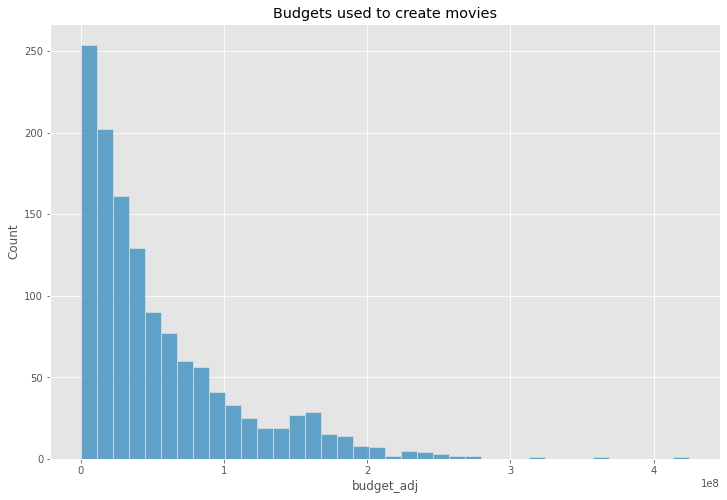

In [28]:
plt.figure(figsize=(12, 8))
sns.histplot(data=tmdb_df, x='budget_adj')
plt.title('Budgets used to create movies');

Plotting the revenue in the box plot to view the outliers better. From the boxplot it shows there are a lot of outliers and removing them might affect the analysis.

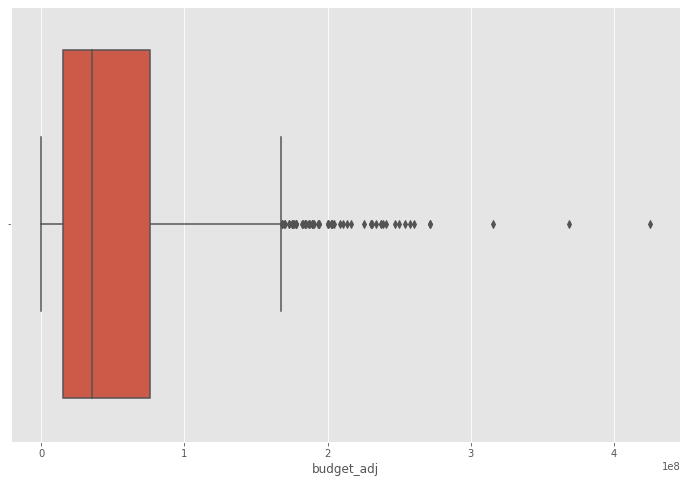

In [29]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=tmdb_df, x='budget_adj');

### Q2 What are the top 10 movies with the highest budget?

Checking the top 10 movies with the highest budgets.

In [30]:
tmdb_df.nlargest(10, 'budget_adj')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2244,46528,tt1032751,0.250540,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,http://www.iamrogue.com/thewarriorsway,Sngmoo Lee,Assassin. Hero. Legend.,...,An Asian assassin (Dong-gun Jang) is forced to...,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,12/2/10,74,6.4,2010,4.250000e+08,1.108757e+07
3375,1865,tt1298650,4.955130,380000000,1021683000,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,http://disney.go.com/pirates/index-on-stranger...,Rob Marshall,Live Forever Or Die Trying.,...,Captain Jack Sparrow crosses paths with a woma...,136,Adventure|Action|Fantasy,Walt Disney Pictures|Jerry Bruckheimer Films|M...,5/11/11,3180,6.3,2011,3.683713e+08,9.904175e+08
7387,285,tt0449088,4.965391,300000000,961000000,Pirates of the Caribbean: At World's End,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,http://disney.go.com/disneypictures/pirates/,Gore Verbinski,"At the end of the world, the adventure begins.",...,"Captain Barbossa, long believed to be dead, ha...",169,Adventure|Fantasy|Action,Walt Disney Pictures|Jerry Bruckheimer Films|S...,5/19/07,2626,6.8,2007,3.155006e+08,1.010654e+09
5231,597,tt0120338,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,http://www.titanicmovie.com/menu.html,James Cameron,Nothing on Earth could come between them.,...,"84 years later, a 101-year-old woman named Ros...",194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/97,4654,7.3,1997,2.716921e+08,2.506406e+09
7394,559,tt0413300,2.520912,258000000,890871626,Spider-Man 3,Tobey Maguire|Kirsten Dunst|James Franco|Thoma...,http://www.sonypictures.com/movies/spider-man3/,Sam Raimi,The battle within.,...,The seemingly invincible Spider-Man goes up ag...,139,Fantasy|Action|Adventure,Columbia Pictures|Laura Ziskin Productions|Mar...,5/1/07,2083,5.8,2007,2.713305e+08,9.369017e+08
1929,38757,tt0398286,2.865684,260000000,591794936,Tangled,Zachary Levi|Mandy Moore|Donna Murphy|Ron Perl...,http://disney.go.com/disneypictures/tangled/,Nathan Greno|Byron Howard,They're taking adventure to new lengths.,...,When the kingdom's most wanted-and most charmi...,100,Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,11/24/10,2019,7.3,2010,2.600000e+08,5.917949e+08
14,99861,tt2395427,5.944927,280000000,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,http://marvel.com/movies/movie/193/avengers_ag...,Joss Whedon,A New Age Has Come.,...,When Tony Stark tries to jumpstart a dormant p...,141,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,4/22/15,4304,7.4,2015,2.575999e+08,1.292632e+09
1389,767,tt0417741,5.076472,250000000,933959197,Harry Potter and the Half-Blood Prince,Daniel Radcliffe|Rupert Grint|Emma Watson|Tom ...,http://harrypotter.warnerbros.com/harrypottera...,David Yates,Dark Secrets Revealed,...,"As Harry begins his sixth year at Hogwarts, he...",153,Adventure|Fantasy|Family,Warner Bros.|Heyday Films,7/7/09,3220,7.3,2009,2.541001e+08,9.492765e+08
1923,12444,tt0926084,4.840588,250000000,954305868,Harry Potter and the Deathly Hallows: Part 1,Daniel Radcliffe|Emma Watson|Rupert Grint|Ralp...,http://www.harrypotter.com,David Yates,One Wayâ€¦ One Fateâ€¦ One Hero.,...,"Harry, Ron and Hermione walk away from their l...",146,Adventure|Fantasy|Family,Warner Bros.|Heyday Films,10/17/10,3467,7.4,2010,2.500000e+08,9.543059e+08
4411,49529,tt0401729,1.588457,260000000,284139100,John Carter,Taylor Kitsch|Lynn Collins|Mark Strong|Willem ...,http://disney.go.com/johncarter/,Andrew Stanton,Lost in Our World. Found in Another.,...,Civil War vet John Carter is transplanted to M...,132,Action|Adventure|Fantasy|Science Fi

Creating a variable for the top 10 movies with the highest budget that will be used to plot the top 10 movies with the highest budget

In [31]:
top10_highest_budget = tmdb_df.nlargest(10, 'budget_adj')

Plotting the top 10 movies with the highest budget.

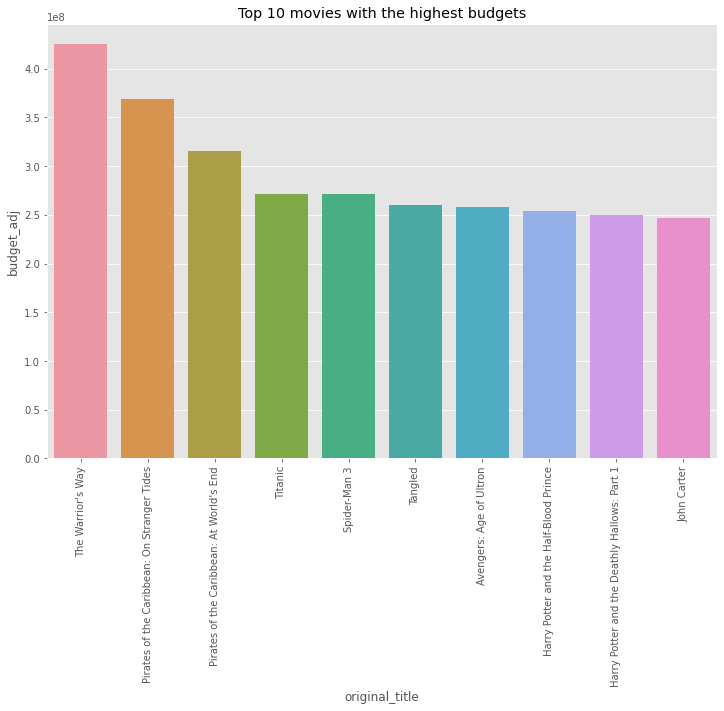

In [32]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top10_highest_budget, x='original_title', y='budget_adj')
plt.xticks(rotation=90)
plt.title('Top 10 movies with the highest budgets');

### Q3: What are the top 10 movies with the lowest budget?

Created a variable in which the movies with the lowest budget is assigned to.

In [33]:
top10_smallest_budget = tmdb_df.nsmallest(10, 'budget_adj')

Checking the top 10 movies with the lowest budget.

In [34]:
top10_smallest_budget

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3581,59296,tt1436559,0.520430,1,1378,"Love, Wedding, Marriage",Mandy Moore|Kellan Lutz|Jessica Szohr|Autumn F...,http://www.ifcfilms.com/films/love-wedding-mar...,Dermot Mulroney,Here comes the ride.,...,A happy newlywed marriage counselor's views on...,90,Comedy|Romance,120dB Films|Scion Films|Voodoo Production Serv...,6/3/11,55,5.3,2011,0.969398,1.335831e+03
2398,39356,tt1560139,0.028456,3,43,Boy,James Rolleston|Craig Hall|Taika Waititi|Te Ah...,http://www.boythemovie.co.nz,Taika Waititi,"Summer, Girls, Gangs, Drugs ... its not easy b...",...,"It's 1984, and Michael Jackson is king - even ...",87,Drama|Comedy,New Zealand Film Commission|Unison Films|Whenu...,2/14/10,26,7.3,2010,3.000000,4.300000e+01
9992,1669,tt0099810,1.072912,30,200,The Hunt for Red October,Alec Baldwin|Sean Connery|Scott Glenn|Sam Neil...,http://www.paramount.com/movies/hunt-red-october,John McTiernan,Invisible. Silent. Stolen.,...,A new Soviet nuclear missile sub (a Boomer) he...,134,Action|Adventure|Thriller,Paramount Pictures|Nina Saxon Film Design|Mace...,3/2/90,615,6.9,1990,50.066956,3.337797e+02
1733,22717,tt1084972,0.278387,75,134,Wanted,Salman Khan|Ayesha Takia|Mahesh Manjrekar|Prak...,http://www.wanted-thefilm.com/,Prabhu Deva,"Mafia wants him DEAD !, Police wants him ALIVE !!",...,Radhe is a hardcore gangster. A sharpshooter w...,129,Action|Comedy|Crime|Thriller,Sahara One Motion Pictures,9/18/09,18,4.9,2009,76.230033,1.361977e+02
3968,4614,tt0164184,0.958182,68,193,The Sum of All Fears,Ben Affleck|Morgan Freeman|James Cromwell|Ken ...,http://www.paramount.com/movies/sum-all-fears,Phil Alden Robinson,"27,000 nuclear weapons. One is missing.",...,CIA analyst Jack Ryan discovers that an Islami...,124,Thriller|Action|Drama,Paramount Pictures|Mace Neufeld Productions|MF...,5/31/02,256,5.7,2002,82.433775,2.339664e+02
3608,50217,tt0893412,0.463510,93,2500000,From Prada to Nada,Camilla Belle|Alexa PenaVega|April Bowlby|Wilm...,http://frompradatonadamovie.com/,Angel Gracia,A riches to rags story.,...,A whimsical fish-out-of-water story of two spo...,107,Comedy|Drama|Romance,Lewis Gilbert Productions|Lionsgate|Modern Vid...,1/28/11,47,5.2,2011,90.154018,2.423495e+06
3755,79120,tt1714210,0.243777,8000,469947,Weekend,Tom Cullen|Chris New|Jonathan Race|Laura Freem...,http://weekenderfilm.tumblr.com/,Andrew Haigh,A (sort of) love story between two guys over a...,...,After a drunken house party with his straight ...,96,Drama|Romance,EM Media|The Bureau|Glendale Picture Company|S...,9/22/11,96,7.4,2011,7755.184341,4.555657e+05
7044,14337,tt0390384,0.856329,7000,424760,Primer,Shane Carruth|David Sullivan|Casey Gooden|Anan...,http://www.primermovie.com,Shane Carruth,What happens if it actually works?,...,Friends/fledgling entrepreneurs invent a devic...,79,Science Fiction|Drama|Thriller,Thinkfilm,10/8/04,341,6.9,2004,8081.117799,4.903622e+05
7447,23827,tt1179904,1.120442,15000,193355800,Paranormal Activity,Katie Featherston|Micah Sloat|Mark Fredrichs|A...,http://www.paranormalactivity-movie.com/,Oren Peli,What Happens When You Sleep?,...,"After a young, middle class couple moves into ...",86,Horror|Mystery,Blumhouse Productions|Solana Films,9/14/07,714,6.1,2007,15775.028739,2.033462e+08
3785,58699,tt1242599,0.195283,17000,101236,Bellflower,Evan Glodell|Jessie Wiseman|Tyler Dawson|Rebek...,http://www.coatwolf.com/,Evan Glodell,A love story with apocalyptic stakes.,...,Two friends spend all their free time building...,106,Action|Drama|Romance,Coatwolf Productions,4/16/11,24,6.7,2011,16479.766724,9.813798e+04


Plotting the top 10 movies with the lowest budget.

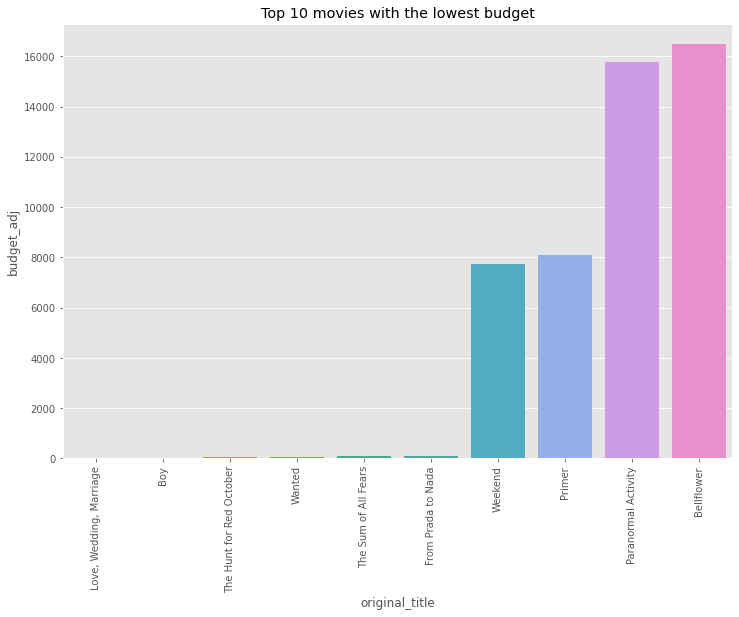

In [35]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top10_smallest_budget, x='original_title', y='budget_adj')
plt.xticks(rotation=90)
plt.title('Top 10 movies with the lowest budget');

### Q4: What are the most common revenue generated?

Checking the counts of the revenue generated the most

In [36]:
tmdb_df['revenue_adj'].value_counts()

1.392446e+09    1
2.280899e+08    1
1.235006e+08    1
1.175070e+08    1
4.978434e+08    1
               ..
1.362642e+07    1
3.988815e+04    1
1.159102e+08    1
2.775049e+08    1
4.713208e+08    1
Name: revenue_adj, Length: 1287, dtype: int64

Checking the unique values of revenue.

In [37]:
tmdb_df['revenue_adj'].nunique()

1287

Plotting the most common revenue generated by movies

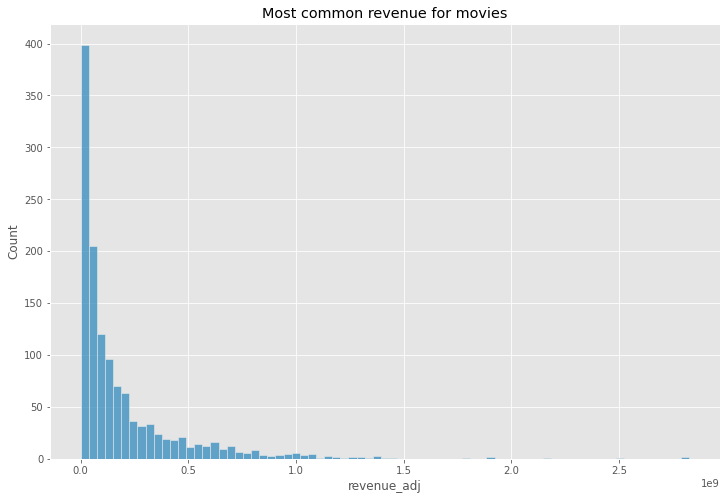

In [38]:
plt.figure(figsize=(12, 8))
sns.histplot(data=tmdb_df, x='revenue_adj')
plt.title('Most common revenue for movies');

Checking the top 10 movies with the highest amounts of revenue generated using boxplot. There are a lot of outliers in the revenue also.

<AxesSubplot:xlabel='revenue_adj'>

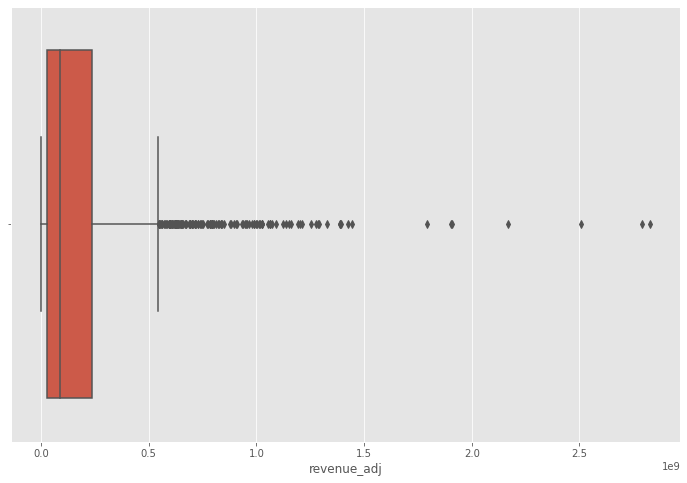

In [39]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=tmdb_df, x='revenue_adj')

### Q5: What are the top 10 movies with the highest budget?

Creating a variable that contains top 10 movies with the highest budget

In [40]:
top10_highest_revenue = tmdb_df.nlargest(10, 'revenue_adj')

Checking the top 10 movies the highest revenue generated.

In [41]:
top10_highest_revenue

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,...,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09
1329,11,tt0076759,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,http://www.starwars.com/films/star-wars-episod...,George Lucas,"A long time ago in a galaxy far, far away...",...,Princess Leia is captured and held hostage by ...,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,3/20/77,4428,7.9,1977,3.957559e+07,2.789712e+09
5231,597,tt0120338,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,http://www.titanicmovie.com/menu.html,James Cameron,Nothing on Earth could come between them.,...,"84 years later, a 101-year-old woman named Ros...",194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/97,4654,7.3,1997,2.716921e+08,2.506406e+09
10594,9552,tt0070047,2.010733,8000000,441306145,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,http://theexorcist.warnerbros.com/,William Friedkin,Something almost beyond comprehension is happe...,...,12-year-old Regan MacNeil begins to adapt an e...,122,Drama|Horror|Thriller,Warner Bros.|Hoya Productions,12/26/73,1113,7.2,1973,3.928928e+07,2.167325e+09
9806,578,tt0073195,2.563191,7000000,470654000,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,http://www.jaws25.com/,Steven Spielberg,Don't go in the water.,...,An insatiable great white shark terrorizes the...,124,Horror|Thriller|Adventure,Universal Pictures|Zanuck/Brown Productions,6/18/75,1415,7.3,1975,2.836275e+07,1.907006e+09
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
8889,601,tt0083866,2.900556,10500000,792910554,E.T. the Extra-Terrestrial,Henry Thomas|Drew Barrymore|Robert MacNaughton...,http://www.et20.com/,Steven Spielberg,He is afraid. He is alone. He is three million...,...,A science fiction fairytale about an extra-ter...,115,Science Fiction|Adventure|Family|Fantasy,Universal Pictures|Amblin Entertainment,4/3/82,1830,7.2,1982,2.372625e+07,1.791694e+09
4361,24428,tt0848228,7.637767,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,http://marvel.com/avengers_movie/,Joss Whedon,Some assembly required.,...,When an unexpected enemy emerges and threatens...,143,Science Fiction|Action|Adventure,Marvel Studios,4/25/12,8903,7.3,2012,2.089437e+08,1.443191e+09
7309,1891,tt0080684,5.488441,18000000,538400000,The Empire Strikes Back,Mark Hamill|Harrison Ford|Carrie Fisher|Billy ...,http://www.starwars.com/films/star-wars-episod...,Irvin Kershner,The Adventure Continues...,...,"The epic saga continues as Luke Skywalker, in ...",124,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,1/1/80,3954,8.0,1980,4.762866e+07,1.424626e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.3

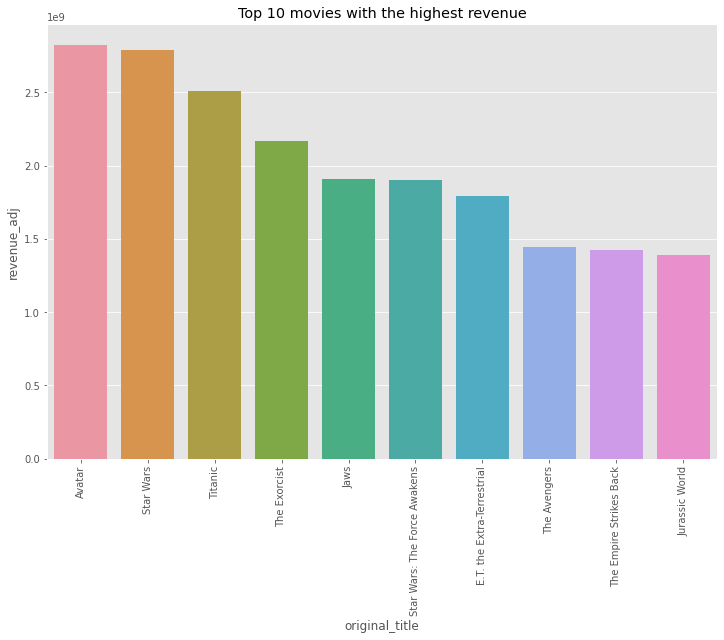

In [42]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top10_highest_revenue, x='original_title', y='revenue_adj')
plt.xticks(rotation=90)
plt.title('Top 10 movies with the highest revenue');

### Q5: What are the top 10 movies the the lowest revenue generated?

Creating a variable that contains the top 10 movies with the lowest revenue generated.

In [43]:
top10_lowest_revenue = tmdb_df.nsmallest(10, 'revenue_adj')

Checking the top 10 movies with lowest revenue generated

In [44]:
top10_lowest_revenue

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2398,39356,tt1560139,0.028456,3,43,Boy,James Rolleston|Craig Hall|Taika Waititi|Te Ah...,http://www.boythemovie.co.nz,Taika Waititi,"Summer, Girls, Gangs, Drugs ... its not easy b...",...,"It's 1984, and Michael Jackson is king - even ...",87,Drama|Comedy,New Zealand Film Commission|Unison Films|Whenu...,2/14/10,26,7.3,2010,3.000000e+00,43.000000
7506,2196,tt0795368,0.642207,9000000,46,Death at a Funeral,Matthew Macfadyen|Alan Tudyk|Peter Dinklage|Ke...,http://www.deathatafuneral-themovie.com/,Frank Oz,From director Frank Oz comes the story of a fa...,...,Chaos ensues when a man tries to expose a dark...,90,Comedy|Drama,Sidney Kimmel Entertainment|Parabolic Pictures...,2/9/07,262,6.7,2007,9.465017e+06,48.376755
1733,22717,tt1084972,0.278387,75,134,Wanted,Salman Khan|Ayesha Takia|Mahesh Manjrekar|Prak...,http://www.wanted-thefilm.com/,Prabhu Deva,"Mafia wants him DEAD !, Police wants him ALIVE !!",...,Radhe is a hardcore gangster. A sharpshooter w...,129,Action|Comedy|Crime|Thriller,Sahara One Motion Pictures,9/18/09,18,4.9,2009,7.623003e+01,136.197658
3968,4614,tt0164184,0.958182,68,193,The Sum of All Fears,Ben Affleck|Morgan Freeman|James Cromwell|Ken ...,http://www.paramount.com/movies/sum-all-fears,Phil Alden Robinson,"27,000 nuclear weapons. One is missing.",...,CIA analyst Jack Ryan discovers that an Islami...,124,Thriller|Action|Drama,Paramount Pictures|Mace Neufeld Productions|MF...,5/31/02,256,5.7,2002,8.243377e+01,233.966449
9992,1669,tt0099810,1.072912,30,200,The Hunt for Red October,Alec Baldwin|Sean Connery|Scott Glenn|Sam Neil...,http://www.paramount.com/movies/hunt-red-october,John McTiernan,Invisible. Silent. Stolen.,...,A new Soviet nuclear missile sub (a Boomer) he...,134,Action|Adventure|Thriller,Paramount Pictures|Nina Saxon Film Design|Mace...,3/2/90,615,6.9,1990,5.006696e+01,333.779708
3581,59296,tt1436559,0.520430,1,1378,"Love, Wedding, Marriage",Mandy Moore|Kellan Lutz|Jessica Szohr|Autumn F...,http://www.ifcfilms.com/films/love-wedding-mar...,Dermot Mulroney,Here comes the ride.,...,A happy newlywed marriage counselor's views on...,90,Comedy|Romance,120dB Films|Scion Films|Voodoo Production Serv...,6/3/11,55,5.3,2011,9.693980e-01,1335.830503
1780,38850,tt1139282,0.220819,2000000,7306,Stolen Lives,Jon Hamm|Josh Lucas|Rhona Mitra|James Van Der ...,http://www.ifcfilms.com/films/stolen,Anders Anderson,Secrets from the past don't stay buried.,...,A detective becomes obsessed with solving a ch...,97,Crime|Drama|Mystery|Thriller,Capitol Films|Boy in the Box|2 Bridges Product...,10/10/09,12,6.0,2009,2.032801e+06,7425.821572
818,242042,tt2355495,0.728025,6000000,15071,Barefoot,Evan Rachel Wood|Scott Speedman|J.K. Simmons|T...,http://barefootthemovie.com/,Andrew Fleming,She's stepping out into the world.,...,"The ""black sheep"" son of a wealthy family meet...",90,Comedy|Drama|Romance,WhiteFlame Productions,2/2/14,129,6.5,2014,5.526546e+06,13881.763226
1561,31723,tt1247704,0.534693,3000000,18097,Women in Trouble,Carla Gugino|Adrianne Palicki|Connie Britton|M...,http://www.womenintroublethemovie.com/,Sebastian Gutierrez,"High Hopes, High Anxiety, High Heels.",...,A serpentine day in the life of ten seemingly ...,92,Comedy|Drama,Gato Negro Films,11/13/09,11,4.5,2009,3.049201e+06,18393.798656
940,244783,tt2182972,0.407983,6000000,32251,Song One,Anne Hathaway|Johnny Flynn|Mary Steenburgen|Be...,http://songonemovie.tumblr.com/,Kate Barker-Froyland,A moment can change everything.,...,"Estranged from her family, Franny returns home...",86,Drama,Worldview Entertainment,1/20/14,58,5.7,2014,5.526546e+06,29706.107478


Plotting the top 10 movies with the lowest revenue generated

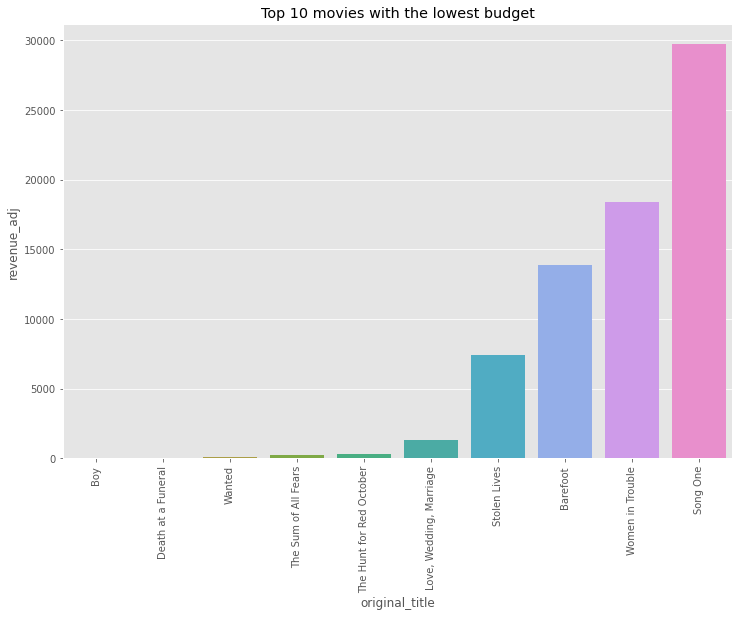

In [45]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top10_lowest_revenue, x='original_title', y='revenue_adj')
plt.xticks(rotation=90)
plt.title('Top 10 movies with the lowest budget');

### Q6: What are the budget spend in each year?

Checking the amounts of budget spend in each year.

In [46]:
tmdb_df.groupby('release_year')['budget_adj'].sum()

release_year
1961    2.188458e+07
1962    7.929294e+06
1963    1.780045e+07
1964    2.812107e+07
1965    7.612620e+07
1967    6.209926e+07
1969    4.160985e+07
1971    7.149923e+07
1972    3.128737e+07
1973    7.366739e+07
1974    3.095599e+07
1975    3.484566e+07
1977    8.994453e+07
1978    1.002810e+07
1979    2.307497e+08
1980    5.027470e+07
1981    1.954526e+08
1982    1.095927e+08
1983    2.580104e+08
1984    1.813572e+08
1985    9.933114e+07
1986    4.973516e+07
1987    1.375981e+08
1988    1.290724e+07
1989    2.286680e+08
1990    1.869167e+08
1991    7.685246e+07
1992    2.497403e+08
1993    3.396307e+08
1994    1.044886e+08
1995    2.734578e+08
1996    7.986795e+08
1997    7.434174e+08
1998    7.081894e+08
1999    1.471408e+09
2000    9.864416e+08
2001    1.280748e+09
2002    1.683225e+09
2003    1.699276e+09
2004    2.824012e+09
2005    2.653485e+09
2006    3.540778e+09
2007    4.932510e+09
2008    4.151007e+09
2009    5.978820e+09
2010    6.845765e+09
2011    7.308776e+09


Plotting the budget spend for the total movies in each year and 2011 is the year with the most budget spend.

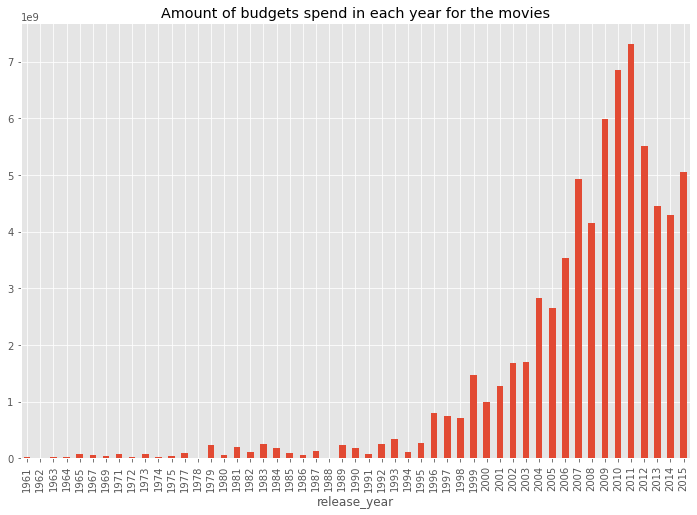

In [47]:
tmdb_df.groupby('release_year')['budget_adj'].sum().plot(kind='bar', 
                                                   figsize=(12, 8),
                                                   title='Amount of budgets spend in each year for the movies');

### Q7: How much revenue was generated in each year?

Checking the revenues generated by the all the movies released in each year.

In [48]:
tmdb_df.groupby('release_year')['revenue_adj'].sum()

release_year
1961    2.917944e+07
1962    4.296236e+08
1963    5.617734e+08
1964    8.851145e+08
1965    9.771535e+08
1967    7.294034e+08
1969    4.872780e+08
1971    9.884310e+08
1972    1.277914e+09
1973    2.961842e+09
1974    4.314911e+08
1975    2.384802e+09
1977    3.456880e+09
1978    7.053098e+08
1979    1.233946e+09
1980    1.481194e+09
1981    1.754672e+09
1982    1.896884e+09
1983    2.185945e+09
1984    1.543484e+09
1985    1.081570e+09
1986    2.188347e+07
1987    8.778683e+08
1988    3.741583e+07
1989    1.763952e+09
1990    1.431879e+09
1991    6.160770e+08
1992    1.829280e+09
1993    2.260439e+09
1994    1.560031e+09
1995    1.741174e+09
1996    2.351105e+09
1997    4.483538e+09
1998    1.798704e+09
1999    6.512812e+09
2000    2.642550e+09
2001    5.157876e+09
2002    6.721852e+09
2003    6.436436e+09
2004    9.588592e+09
2005    6.853760e+09
2006    1.012613e+10
2007    1.546480e+10
2008    1.227080e+10
2009    1.891030e+10
2010    1.884159e+10
2011    2.084199e+10


Plotting the total amounts of revenue generated by all the movies in each year and the year 2011 is also the year with the most revenue generated.

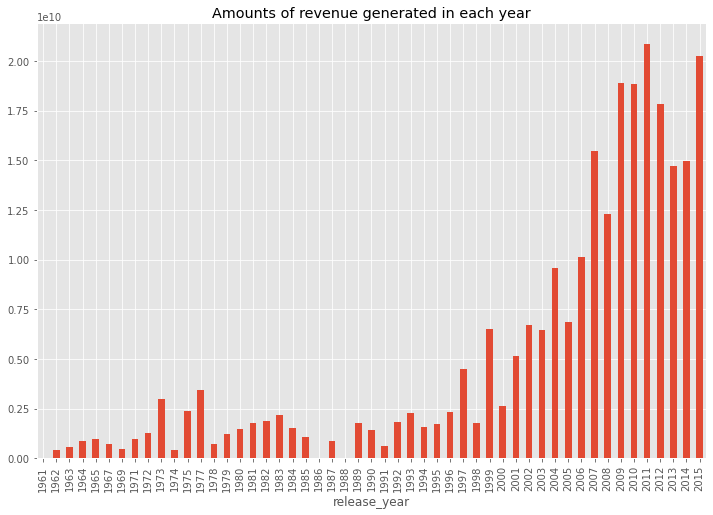

In [49]:
tmdb_df.groupby('release_year')['revenue_adj'].sum().plot(kind='bar', figsize=(12, 8), 
                                                         title='Amounts of revenue generated in each year');

### Q8: What year is unprofitable for the movie industry?

Checking the total bugets in each year to the amounts of revenue generated.

In [50]:
tmdb_df.groupby('release_year')[['budget_adj', 'revenue_adj']].sum()

,budget_adj,revenue_adj
release_year,,
1961,2.188458e+07,2.917944e+07
1962,7.929294e+06,4.296236e+08
1963,1.780045e+07,5.617734e+08
1964,2.812107e+07,8.851145e+08
1965,7.612620e+07,9.771535e+08
1967,6.209926e+07,7.294034e+08
1969,4.160985e+07,4.872780e+08
1971,7.149923e+07,9.884310e+08
1972,3.128737e+07,1.277914e+09


Plotting to compare the budgets to the revenue created in each year and there is no year that wasn't profitable for the movie industry.

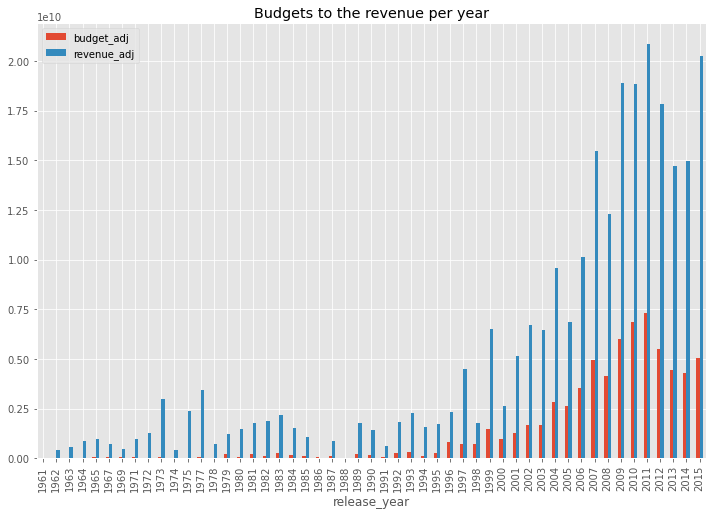

In [51]:
tmdb_df.groupby('release_year')[['budget_adj', 'revenue_adj']].sum().plot(kind='bar', figsize=(12, 8), 
                                                                         title='Budgets to the revenue per year');

### Q9: What is the average votes per movies?

In [52]:
tmdb_df['vote_average'].value_counts()

6.5    69
6.3    65
5.9    65
6.0    62
6.1    62
6.2    62
6.6    61
6.9    59
5.8    58
6.4    58
6.7    53
6.8    47
5.5    46
5.7    46
5.6    44
7.0    43
7.3    36
7.1    35
5.2    33
5.3    30
7.2    30
7.6    25
5.4    23
7.5    20
5.1    18
7.4    17
7.7    14
7.8    14
4.9    12
5.0    11
7.9     9
8.0     8
4.8     8
4.4     7
4.7     6
4.6     6
4.5     5
3.8     4
8.1     3
4.2     3
3.9     2
4.3     2
4.0     1
3.3     1
8.2     1
2.2     1
3.4     1
8.3     1
Name: vote_average, dtype: int64

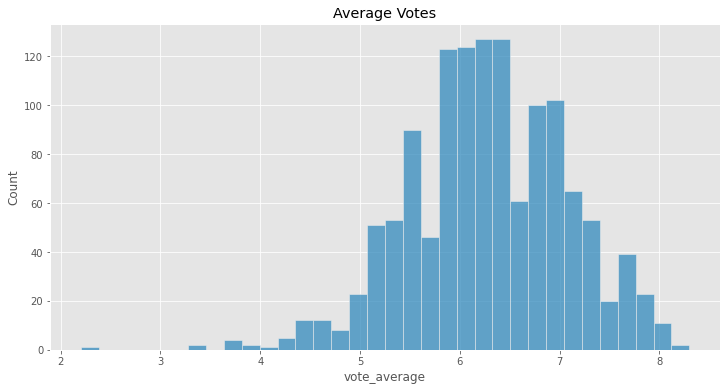

In [53]:
plt.figure(figsize=(12, 6))
sns.histplot(data=tmdb_df, x='vote_average')
plt.title('Average Votes');

### Q10: What are the 10 movies with the highest average votes?

Creating a variable to store top 10 movies with the highest average votes.

In [54]:
top10_highest_avg_votes = tmdb_df.nlargest(10, 'vote_average')

Checking the top 10 movies with the highest average votes

In [55]:
top10_highest_avg_votes

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
7269,238,tt0068646,5.738034,6000000,245066411,The Godfather,Marlon Brando|Al Pacino|James Caan|Richard S. ...,http://www.thegodfather.com/,Francis Ford Coppola,An offer you can't refuse.,...,"Spanning the years 1945 to 1955, a chronicle o...",175,Drama|Crime,Paramount Pictures|Alfran Productions,3/15/72,3970,8.3,1972,3.128737e+07,1.277914e+09
650,244786,tt2582802,4.780419,3300000,13993093,Whiplash,Miles Teller|J.K. Simmons|Melissa Benoist|Aust...,http://sonyclassics.com/whiplash/,Damien Chazelle,The road to greatness can take you to the edge.,...,"Under the direction of a ruthless instructor, ...",105,Drama|Music,Bold Films|Blumhouse Productions|Right of Way ...,10/10/14,2372,8.2,2014,3.039600e+06,1.288891e+07
2409,550,tt0137523,8.947905,63000000,100853753,Fight Club,Edward Norton|Brad Pitt|Meat Loaf|Jared Leto|H...,http://www.foxmovies.com/movies/fight-club,David Fincher,How much can you know about yourself if you've...,...,A ticking-time-bomb insomniac and a slippery s...,139,Drama,Regency Enterprises|Fox 2000 Pictures|Taurus F...,10/14/99,5923,8.1,1999,8.247033e+07,1.320229e+08
2875,155,tt0468569,8.466668,185000000,1001921825,The Dark Knight,Christian Bale|Michael Caine|Heath Ledger|Aaro...,http://thedarkknight.warnerbros.com/dvdsite/,Christopher Nolan,Why So Serious?,...,Batman raises the stakes in his war on crime. ...,152,Drama|Action|Crime|Thriller,DC Comics|Legendary Pictures|Warner Bros.|Syncopy,7/16/08,8432,8.1,2008,1.873655e+08,1.014733e+09
10222,424,tt0108052,2.377288,22000000,321265768,Schindler's List,Liam Neeson|Ben Kingsley|Ralph Fiennes|Carolin...,http://www.schindlerslist.com/,Steven Spielberg,"Whoever saves one life, saves the world entire.",...,The true story of how businessman Oskar Schind...,195,Drama|History|War,Universal Pictures|Amblin Entertainment,11/29/93,2632,8.1,1993,3.320834e+07,4.849410e+08
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08
35,264644,tt3170832,3.557846,6000000,35401758,Room,Brie Larson|Jacob Tremblay|Joan Allen|Sean Bri...,http://www.roomthemovie.com,Lenny Abrahamson,Love knows no boundaries,...,Jack is a young boy of 5 years old who has liv...,117,Drama|Thriller,Element Pictures|No Trace Camping|A24|Duperele...,10/16/15,1520,8.0,2015,5.519998e+06,3.256960e+07
629,157336,tt0816692,24.949134,165000000,621752480,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,http://www.interstellarmovie.net/,Christopher Nolan,Mankind was born on Earth. It was never meant ...,...,Interstellar chronicles the adventures of a gr...,169,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,11/5/14,6498,8.0,2014,1.519800e+08,5.726906e+08
636,205596,tt2084970,8.110711,14000000,233555708,The Imitation Game,Benedict Cumberbatch|Keira Knightley|Matthew G...,http://theimitationgamemovie.com/,Morten Tyldum,The true enigma was the man who cracked the code.,...,Based on the real life story of legendary cryp...,113,History|Drama|Thriller|War,Black Bear Pictures|Bristol Automotive,11/14/14,3478,8.0,2014,1.289527e+07,2.151261e+08
2414,497,tt0120689,2.719461,60000000,284600000,The Green Mile,Tom Hanks|Michael Clarke Duncan|David Morse|Bo...,http://thegreenmile.warnerbros.com/,Frank Darabont,Miracles do happen.,...,A supernatural tale set on death row in a Sout...,189,Fantasy|Drama|Crime,Castle Rock Entertainment|Darkwoods Production...,12/10/99,2299,8.0,1999,7.854317e+07,3.725564e+08


Creating a user defined function to create plots

In [56]:
def my_plot(x, y, *args):
    plt.figure(figsize=(12, 8))
    sns.barplot(x, y, *args)
    plt.xticks(rotation=90)

Plotting to view the top 10 movies with the highest average votes


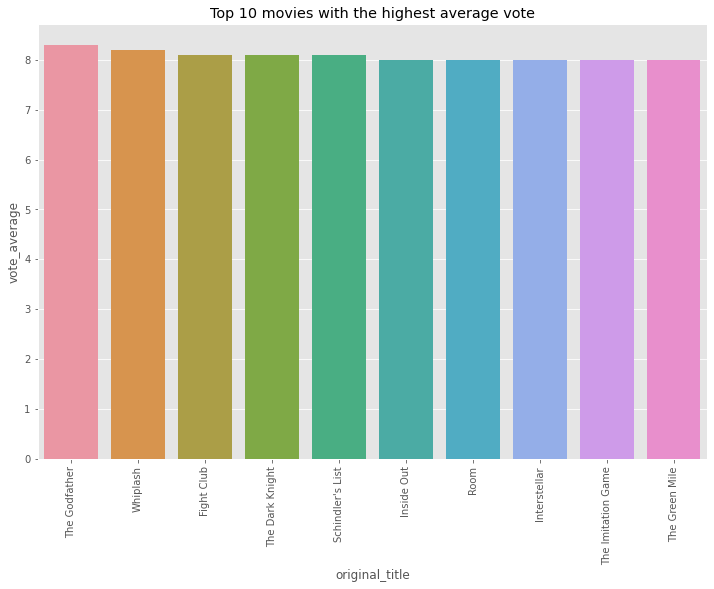

In [70]:
my_plot(x=top10_highest_avg_votes['original_title'], 
        y=top10_highest_avg_votes['vote_average'])
plt.title('Top 10 movies with the highest average vote');

### Q11: What are the top 10 movies with the lowest average votes?

Creating a variable that contains the top 10 movies with the lowest average votes.

In [58]:
top10_lowest_avg_votes = tmdb_df.nsmallest(10, 'vote_average')

Checking the top 10 movies with the lowest average votes

In [59]:
top10_lowest_avg_votes

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
4859,116977,tt0249516,0.111351,65000000,73706,Foodfight!,Charlie Sheen|Wayne Brady|Hilary Duff|Eva Long...,http://www.thresholdanimationstudios.com/video...,Lawrence Kasanoff,When good food... goes bad!,...,"Dex, a superdog sleuth, is the law of the land...",87,Animation|Action|Comedy|Family,Threshold Entertainment|Lions Gate Family Ente...,6/15/12,12,2.2,2012,6.173338e+07,7.000185e+04
3134,13805,tt1213644,0.812489,25000000,14109284,Disaster Movie,Matt Lanter|Vanessa Lachey|Nicole Ari Parker|C...,http://www.disastermovie.net/,Jason Friedberg|Aaron Seltzer,Your favorite movies are going to be destroyed.,...,"In DISASTER MOVIE, the filmmaking team behind ...",87,Action|Comedy,Grosvenor Park Media Ltd.|LionsGate|3 in the Box,8/29/08,130,3.3,2008,2.531967e+07,1.428969e+07
5082,11059,tt0317676,0.422393,7000000,13818181,House of the Dead,Jonathan Cherry|Tyron Leitso|Clint Howard|Ona ...,http://www.house-of-the-dead.com/,Uwe Boll,You won't last the night.,...,"Set on an island off the coast, a techno rave ...",90,Horror|Action|Thriller,Boll Kino Beteiligungs GmbH & Co. KG|Brightlig...,4/11/03,35,3.4,2003,8.297469e+06,1.637942e+07
682,218043,tt2467046,2.601775,16000000,19682924,Left Behind,Nicolas Cage|Chad Michael Murray|Lea Thompson|...,http://www.leftbehindmovie.com/,Vic Armstrong,The End Begins,...,A small group of survivors are left behind aft...,110,Thriller|Action|Science Fiction,Stoney Lake Entertainment,10/3/14,253,3.8,2014,1.473746e+07,1.812977e+07
5064,8046,tt0299930,0.470814,54000000,7266209,Gigli,Ben Affleck|Jennifer Lopez|Justin Bartha|Laini...,http://www.sonypictures.com/homevideo/catalog/...,Martin Brest,Life doesn't play by the rules.,...,Gigli is ordered to kidnap the psychologically...,121,Drama,City Light Films|Revolution Studios|Casey Silv...,8/1/03,48,3.8,2003,6.400904e+07,8.613020e+06
6315,168705,tt0383222,0.592369,25000000,2405420,BloodRayne,Kristanna Loken|Ben Kingsley|Michelle Rodrigue...,http://www.bloodrayne-themovie.com/main/index....,Uwe Boll,Revenge never tasted so sweet.,...,"In eighteenth century Romania, Rayne, a dhampi...",95,Action|Adventure|Fantasy|Horror,Boll KG,10/22/05,62,3.8,2005,2.791408e+07,2.685804e+06
7482,5857,tt0897361,0.811539,12000000,9620399,I Know Who Killed Me,Lindsay Lohan|Julia Ormond|Neal McDonough|Bria...,http://sonypictures.com/homevideo/iknowwhokill...,Chris Sivertson,There are two sides to every crime.,...,An idyllic small town is rocked when Aubrey Fl...,105,Crime|Horror|Mystery|Thriller,TriStar Pictures|360 Pictures,7/27/07,44,3.8,2007,1.262002e+07,1.011747e+07
102,241251,tt3181822,1.651078,4000000,50163103,The Boy Next Door,Jennifer Lopez|Ryan Guzman|Ian Nelson|John Cor...,http://www.theboynextdoorfilm.com/,Rob Cohen,A Moment She Couldn't Resist. An Obsession He ...,...,A recently cheated on married woman falls for ...,91,Thriller,Universal Pictures|Nuyorican Productions|Blumh...,1/23/15,810,3.9,2015,3.679998e+06,4.615003e+07
6423,18882,tt0290747,0.287286,7500000,143000,Man-Thing,Matthew Le Nevez|Rachael Taylor|Jack Thompson|...,http://marvel.com/movies/movie/4/man-thing,Brett Leonard,The Nature of Fear,...,Agents of an oil tycoon vanish while exploring...,97,Action|Horror|Science Fiction,Lions Gate Films|Artisan Entertainment|Marvel ...,4/21/05,15,3.9,2005,8.374225e+06,1.596686e+05
2997,7278,tt1073498,0.686750,30000000,84646831,Meet the Spartans,Sean Maguire|Carmen Electra|Ken Davitian|Kevin...,http://www.meetthespartans.com/,Jason Friedberg|Aaron Seltzer,"The Bigger the Hit, The Harder They Fall",...,From the creators of Scary Movie and Date Movi...,84,Comedy,Regency Enterprises|New Regency Pictures,1/24/08,182,4.0,2008,3.038360e+07,8.572918e+07


Plotting to view the top 10 movies with the lowest average votes counts

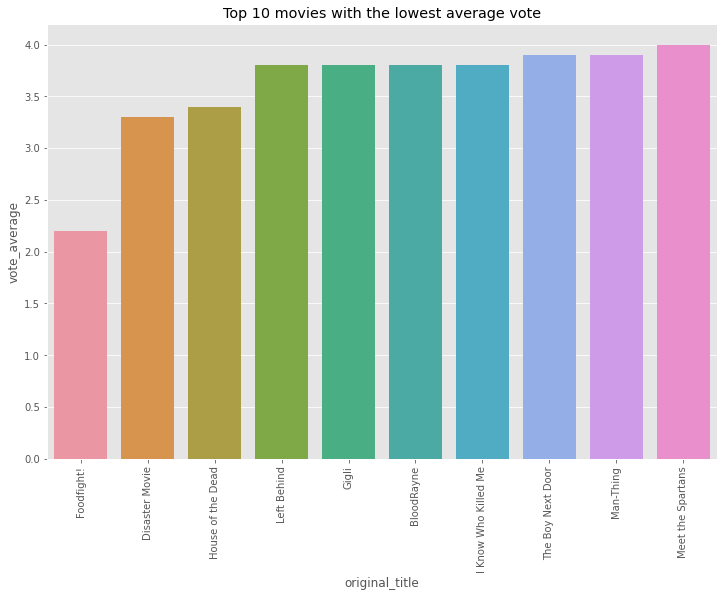

In [71]:
my_plot(top10_lowest_avg_votes['original_title'], 
        top10_lowest_avg_votes['vote_average'])
plt.title('Top 10 movies with the lowest average vote');

### Q12: What are vote counts per movies?

Checking the counts of the votes counts

In [61]:
tmdb_df['vote_count'].value_counts()

130     7
63      6
78      6
205     6
423     6
       ..
6220    1
1537    1
2013    1
2149    1
258     1
Name: vote_count, Length: 894, dtype: int64

Checking the number of unique values of votes counts

In [62]:
tmdb_df['vote_count'].nunique()

894

Plotting to show the number of average vote counts

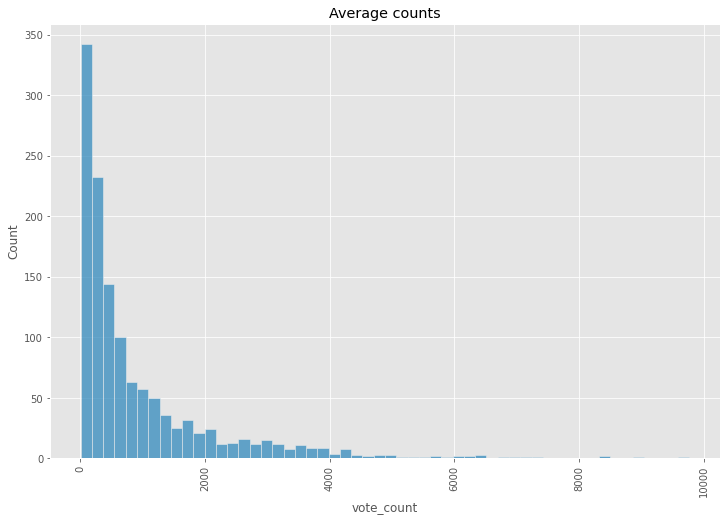

In [63]:
plt.figure(figsize=(12, 8))
sns.histplot(data=tmdb_df, x='vote_count')
plt.xticks(rotation=90)
plt.title('Average counts');

### Q13: What are the top 10 movies with the highest votes counts?

Creating a variable that will store the top 10 highest votes counts

In [64]:
top10_highest_count_votes = tmdb_df.nlargest(10, 'vote_count')

Checking the top 10 movies with the highest votes counts

In [65]:
top10_highest_count_votes

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,http://inceptionmovie.warnerbros.com/,Christopher Nolan,Your mind is the scene of the crime.,...,"Cobb, a skilled thief who commits corporate es...",148,Action|Thriller|Science Fiction|Mystery|Adventure,Legendary Pictures|Warner Bros.|Syncopy,7/14/10,9767,7.9,2010,1.600000e+08,8.255000e+08
4361,24428,tt0848228,7.637767,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,http://marvel.com/avengers_movie/,Joss Whedon,Some assembly required.,...,When an unexpected enemy emerges and threatens...,143,Science Fiction|Action|Adventure,Marvel Studios,4/25/12,8903,7.3,2012,2.089437e+08,1.443191e+09
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,...,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09
2875,155,tt0468569,8.466668,185000000,1001921825,The Dark Knight,Christian Bale|Michael Caine|Heath Ledger|Aaro...,http://thedarkknight.warnerbros.com/dvdsite/,Christopher Nolan,Why So Serious?,...,Batman raises the stakes in his war on crime. ...,152,Drama|Action|Crime|Thriller,DC Comics|Legendary Pictures|Warner Bros.|Syncopy,7/16/08,8432,8.1,2008,1.873655e+08,1.014733e+09
4364,68718,tt1853728,5.944518,100000000,425368238,Django Unchained,Jamie Foxx|Christoph Waltz|Leonardo DiCaprio|K...,http://unchainedmovie.com/,Quentin Tarantino,"Life, liberty and the pursuit of vengeance.",...,"With the help of a German bounty hunter, a fre...",165,Drama|Western,Columbia Pictures|The Weinstein Company,12/25/12,7375,7.7,2012,9.497443e+07,4.039911e+08
4382,70160,tt1392170,2.571099,75000000,691210692,The Hunger Games,Jennifer Lawrence|Josh Hutcherson|Liam Hemswor...,http://www.thehungergames.movie/,Gary Ross,May The Odds Be Ever In Your Favor.,...,Every year in the ruins of what was once North...,142,Science Fiction|Adventure|Fantasy,Lionsgate|Color Force,3/12/12,7080,6.7,2012,7.123082e+07,6.564734e+08
5425,68721,tt1300854,4.946136,200000000,1215439994,Iron Man 3,Robert Downey Jr.|Gwyneth Paltrow|Guy Pearce|D...,http://marvel.com/ironman3,Shane Black,Unleash the power behind the armor.,...,When Tony Stark's world is torn apart by a for...,130,Action|Adventure|Science Fiction,Marvel Studios,4/18/13,6882,6.9,2013,1.872067e+08,1.137692e+09
4363,49026,tt1345836,6.591277,250000000,1081041287,The Dark Knight Rises,Christian Bale|Michael Caine|Gary Oldman|Anne ...,http://www.thedarkknightrises.com/,Christopher Nolan,The Legend Ends,...,Following the death of District Attorney Harve...,165,Action|Crime|Drama|Thriller,Legendary Pictures|Warner Bros.|DC Entertainme...,7/16/12,6723,7.5,2012,2.374361e+08,1.026713e+09
629,157336,tt0816692,24.949134,165000000,621752480,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,http://www.interstellarmovie.net/,Christopher Nolan,Mankind was born on Earth. It was never meant ...,...,Interstellar chronicles the adventures of a gr...,169,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,11/5/14,6498,8.0,2014,1.519800e+08,5.726906e+08
4367,49051,tt0903624,4.218933,250000000,1017003568,The Hobbit: An Unexpected Journey,Ian McKellen|Martin Freeman|Richard Armitage|A...,http://www.thehobbit.com/,Peter Jackson,From the smallest beginnings come the greatest...,...,"Bilbo Baggins, a hobbit enjoying his quiet lif...",169,Adventure|Fantasy|Action,WingNut Films|New Line Cinema|Metro-Goldwyn-Ma...,11/26/12,6417,6.9,2012,2.374361e+08,9.658933e+08


Plotting to view the top 10 movies with the highest vote counts

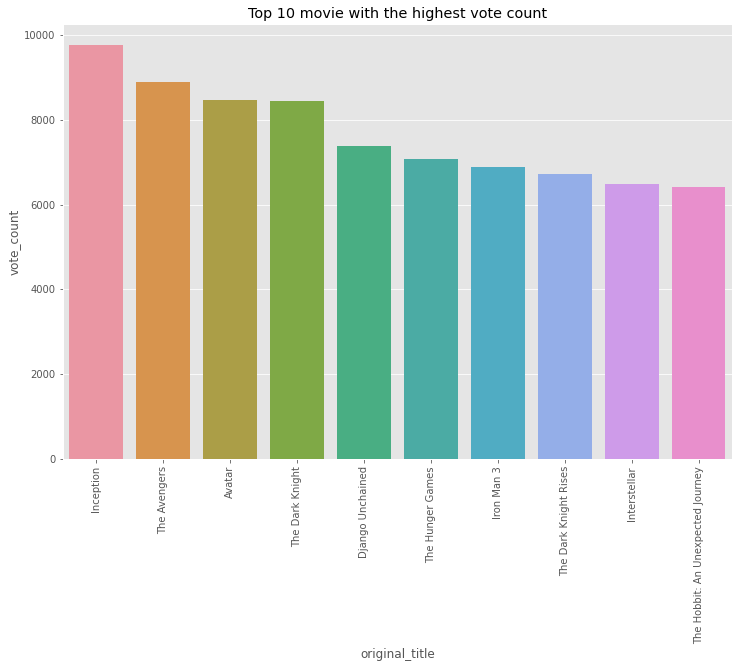

In [72]:
my_plot(top10_highest_count_votes['original_title'], 
        top10_highest_count_votes['vote_count'])
plt.title('Top 10 movie with the highest vote count');

### Q13: What are the top 10 movies with the lowest votes count?

Creating a variable that will contain the top 10 movies with the lowest votes counts

In [67]:
top10_lowest_count_votes = tmdb_df.nsmallest(10, 'vote_count')

Checking the top 10 movies with the lowest votes counts

In [68]:
top10_lowest_count_votes

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
5679,175541,tt1425922,0.442256,17500000,7018189,Black Nativity,Forest Whitaker|Angela Bassett|Jennifer Hudson...,http://www.foxsearchlight.com/blacknativity/,Kasi Lemmons,The Musical Event of the Holiday Season,...,A street-wise teen from Baltimore who has been...,93,Drama|Music,Fox Searchlight Pictures|Fox Searchlight,11/27/13,10,6.2,2013,1.638058e+07,6.569259e+06
1507,39800,tt0808526,0.713022,4500000,744816,Life During Wartime,Ally Sheedy|Paul Reubens|Shirley Henderson|All...,http://www.ifcfilms.com/films/life-during-wart...,Todd Solondz,"Friends, family, and lovers struggle to find l...",...,Life During Wartime is a film by Todd Solondz....,97,Comedy|Drama,Werc Werk Works,10/10/09,11,5.1,2009,4.573802e+06,7.570313e+05
1561,31723,tt1247704,0.534693,3000000,18097,Women in Trouble,Carla Gugino|Adrianne Palicki|Connie Britton|M...,http://www.womenintroublethemovie.com/,Sebastian Gutierrez,"High Hopes, High Anxiety, High Heels.",...,A serpentine day in the life of ten seemingly ...,92,Comedy|Drama,Gato Negro Films,11/13/09,11,4.5,2009,3.049201e+06,1.839380e+04
1780,38850,tt1139282,0.220819,2000000,7306,Stolen Lives,Jon Hamm|Josh Lucas|Rhona Mitra|James Van Der ...,http://www.ifcfilms.com/films/stolen,Anders Anderson,Secrets from the past don't stay buried.,...,A detective becomes obsessed with solving a ch...,97,Crime|Drama|Mystery|Thriller,Capitol Films|Boy in the Box|2 Bridges Product...,10/10/09,12,6.0,2009,2.032801e+06,7.425822e+03
2230,56601,tt0473102,0.271381,12500000,3878993,The Perfect Game,"Clifton Collins, Jr.|Cheech Marin|MoisÃ©s Aria...",http://www.theperfectgamemovie.com,William Dear,Dream for the fences.,...,"Based on a true story, a group of boys from Mo...",118,Drama|Family,HighRoad Entertainment|Prelude Pictures|Lone R...,4/1/10,12,5.7,2010,1.250000e+07,3.878993e+06
3340,13359,tt1091617,0.021371,3500000,7700000,Expelled: No Intelligence Allowed,Ben Stein|Richard Dawkins|William Dembski|Paul...,http://www.expelledthemovie.com/,Nathan Frankowski,Big science has expelled smart new ideas from ...,...,"Hosted by Ben Stein, this controversial docume...",90,Documentary,Premise Media Corporation,4/18/08,12,4.5,2008,3.544753e+06,7.798457e+06
4859,116977,tt0249516,0.111351,65000000,73706,Foodfight!,Charlie Sheen|Wayne Brady|Hilary Duff|Eva Long...,http://www.thresholdanimationstudios.com/video...,Lawrence Kasanoff,When good food... goes bad!,...,"Dex, a superdog sleuth, is the law of the land...",87,Animation|Action|Comedy|Family,Threshold Entertainment|Lions Gate Family Ente...,6/15/12,12,2.2,2012,6.173338e+07,7.000185e+04
8883,36047,tt0163676,0.015997,15000000,5217498,The In Crowd,Susan Ward|Lori Heuring|Matthew Settle|Nathan ...,http://in-crowd.warnerbros.com/,Mary Lambert,What would you do to get in?,...,A mentally disturbed young woman takes a job a...,105,Thriller,Warner Bros. Pictures,7/19/00,12,5.2,2000,1.899438e+07,6.606877e+06
5133,321,tt0330602,0.276911,4361898,3031801,Mambo Italiano,Luke Kirby|Ginette Reno|Paul Sorvino|Mary Wals...,http://mamboitaliano.ca/,Ã‰mile Gaudreault,Things change. Family doesn't.,...,A sweet comic film about an Italian man who co...,92,Comedy|Romance,icon,6/6/03,13,5.2,2003,5.170387e+06,3.593753e+06
583,273899,tt3018070,0.076109,13500000,187674,Stonewall,Jeremy Irvine|Jonny Beauchamp|Jonathan Rhys Me...,https://twitter.com/Stonewall_Movie,Roland Emmerich,Where Pride Began,...,"""Stonewall"" is a drama about a young man in Ne...",129,Drama,Centropolis Entertainment|Mel's Cite du Cinema,9/18/15,14,5.6,2015,1.241999e+07,1.726600e+05


Plotting to view the top 10 movies with the lowest votes counts

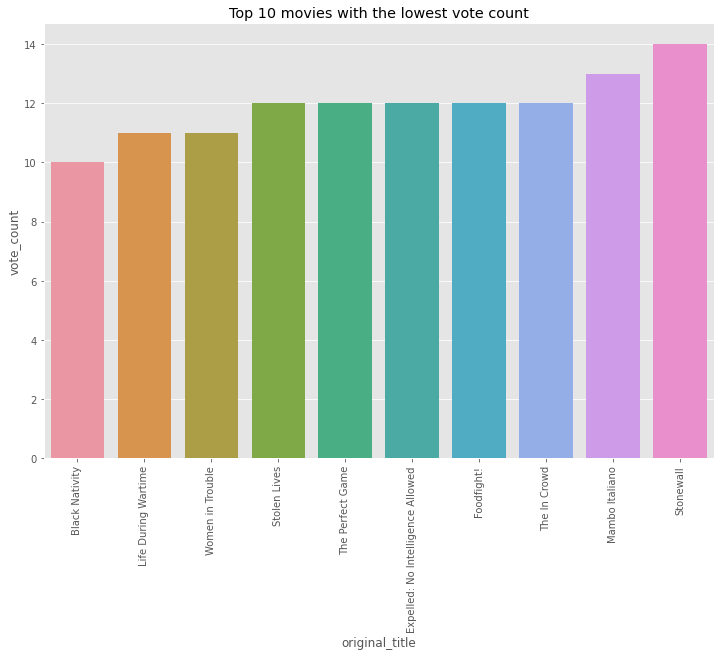

In [73]:
my_plot(top10_lowest_count_votes['original_title'], 
       top10_lowest_count_votes['vote_count'])
plt.title('Top 10 movies with the lowest vote count');

## Conclusion


The adjusted budget and revenue shows that movies making a lot of revenue doesn't mean it is a very good watch for the viewers. Avatar is the movie with the highest revenue generated but it is not in the top 10 of the highest average vote counts while The GodFather is the number one movie with the highest average vote.

There are movies that spend a have a lot on budgets and also make a lot of revenue but doesn't mean the movie was very profitable. Example of such movie is Avatar. 

The year 2010 was a successful year for the movie industry in terms of the revenue generated but the ouptut of such year doesn't really mean it was a good year with the amount of movies released. The comparison between the budget of all the movies in each to the revenue shows also that all year was profitable to the movie industry

### Limitation

The adjusted revenue and budget contains a lot of outliers which actually skew the data to the left and that might make the analysis a bit bias because of it.

Revenue and budget with zeros also might increase the chance of the outliers in the dataset which makes our dataset reduced drastically and might affect the output of the analysis.